In [1]:
# library
import pandas as pd
import os 
import feather
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARMAResults
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, pearsonr

In [2]:
# read in AR1 pars
ar1pars = feather.read_dataframe('AR1_pars.feather')

# Simulate one household

True 1200 20


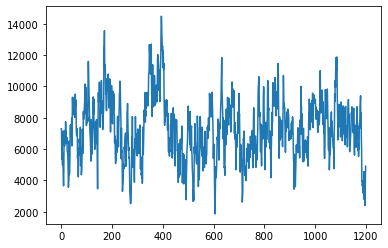

In [3]:
# test
nsample = 1200
forecast_steps = 20
np.random.seed(2)

rho = ar1pars.iloc[0,1]
intcpt = ar1pars.iloc[0,0]
sd = ar1pars.iloc[0,2]

ar1 = np.array([1, -rho])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_0 = AR_object1.generate_sample(nsample=nsample+forecast_steps)*sd  + intcpt
simulated_data_1 = simulated_data_0[:-forecast_steps]
simulated_forecast =  simulated_data_0[-forecast_steps:] 
plt.plot(simulated_data_1)
print(AR_object1.isstationary, len(simulated_data_1), len(simulated_forecast))


In [4]:
# fit model
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print(rho ,intcpt ,sd )


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1200
Model:                     ARMA(1, 0)   Log Likelihood               -9899.227
Method:                       css-mle   S.D. of innovations            925.005
Date:                Tue, 19 Apr 2022   AIC                          19804.454
Time:                        12:28:02   BIC                          19819.724
Sample:                             0   HQIC                         19810.206
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7291.2453    220.125     33.123      0.000    6859.807    7722.683
ar.L1.y        0.8794      0.014     64.094      0.000       0.853       0.906
                                    Roots           

C:\Users\Yi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [5]:
# true model
armar = ARMAResults(mod, params=np.array([1,0.9]))

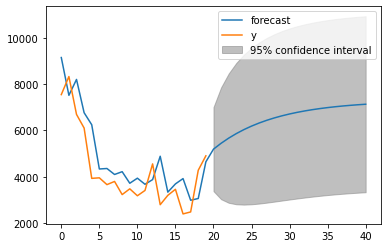

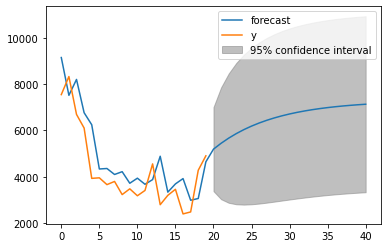

In [6]:
res.plot_predict(start= nsample-forecast_steps , end= nsample+forecast_steps)